In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import pystan
import scipy

%matplotlib inline

In [8]:
plt.style.use('ggplot')

In [9]:
df = pd.read_excel('./data/data.xlsx')

In [10]:
df.head()

,Unnamed: 0,0
0,0,3.896195
1,1,5.865766
2,2,5.860887
3,3,4.660614
4,4,5.263595


(array([ 1.,  1.,  5., 12., 10., 18., 16.,  8.,  5.,  4.]),
 array([2.29193477, 2.77510498, 3.25827519, 3.74144541, 4.22461562,
        4.70778584, 5.19095605, 5.67412627, 6.15729648, 6.64046669,
        7.12363691]),
 <a list of 10 Patch objects>)

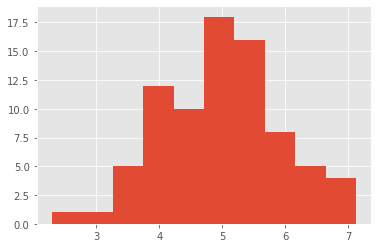

In [11]:
plt.hist(df[0])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  80 non-null     int64  
 1   0           80 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [14]:
df.describe()

,Unnamed: 0,0
count,80.0000,80.000000
mean,39.5000,4.976099
std,23.2379,0.957525
min,0.0000,2.291935
25%,19.7500,4.272243
50%,39.5000,5.066591
75%,59.2500,5.642248
max,79.0000,7.123637


In [19]:
stan_model = """
data {
  int N;
  real Y[N];
}

parameters {
  real mu;
  real<lower=0> sigma;
}

model {
  for (i in 1:N){
    Y[i] ~ normal(mu, sigma);
  }
}
"""

In [20]:
sm = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4abdfcd24c05f6fb8dff0fb579217c90 NOW.


In [23]:
stan_data = {"N":df.shape[0], "Y":df[0]}

In [24]:
fit = sm.sampling(data=stan_data, iter=2000, chains=3, warmup=500, seed=123)

In [25]:
fit

Inference for Stan model: anon_model_4abdfcd24c05f6fb8dff0fb579217c90.
3 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=4500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu      4.97  1.8e-3   0.11   4.76    4.9   4.98   5.05   5.18   3520    1.0
sigma   0.97  1.3e-3   0.08   0.83   0.92   0.97   1.02   1.14   3827    1.0
lp__  -37.07    0.02   0.99 -39.79 -37.48 -36.76 -36.36  -36.1   2103    1.0

Samples were drawn using NUTS at Sat May 23 16:51:55 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

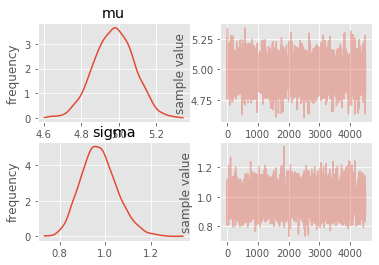

In [29]:
fig = fit.plot()